DATA COLLECTION

In [310]:
#pip install seaborn

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset available here

https://archive.ics.uci.edu/dataset/360/air+quality

In [312]:

file_path = r"h:\Documents\A4\air quality\AirQualityUCI.csv"
data = pd.read_csv(file_path, sep=';')



In [313]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [314]:
data.shape

(9471, 17)

In [315]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We need to filter missing datas.

In [316]:
print(data.describe(include='all'))

print(data.info())
print(data.isna().sum())

data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])


              Date      Time CO(GT)  PT08.S1(CO)     NMHC(GT) C6H6(GT)  \
count         9357      9357   9357  9357.000000  9357.000000     9357   
unique         391        24    104          NaN          NaN      408   
top     03/04/2005  18.00.00   -200          NaN          NaN   -200,0   
freq            24       390   1592          NaN          NaN      366   
mean           NaN       NaN    NaN  1048.990061  -159.090093      NaN   
std            NaN       NaN    NaN   329.832710   139.789093      NaN   
min            NaN       NaN    NaN  -200.000000  -200.000000      NaN   
25%            NaN       NaN    NaN   921.000000  -200.000000      NaN   
50%            NaN       NaN    NaN  1053.000000  -200.000000      NaN   
75%            NaN       NaN    NaN  1221.000000  -200.000000      NaN   
max            NaN       NaN    NaN  2040.000000  1189.000000      NaN   

        PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count     9357.000000  9357.0000

We that the missing values are above the 9357 rows so we will focus our attention only the first 9357 rows.

In [317]:
data = data.head(9357)

In [318]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


About the correlation between variables

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `p

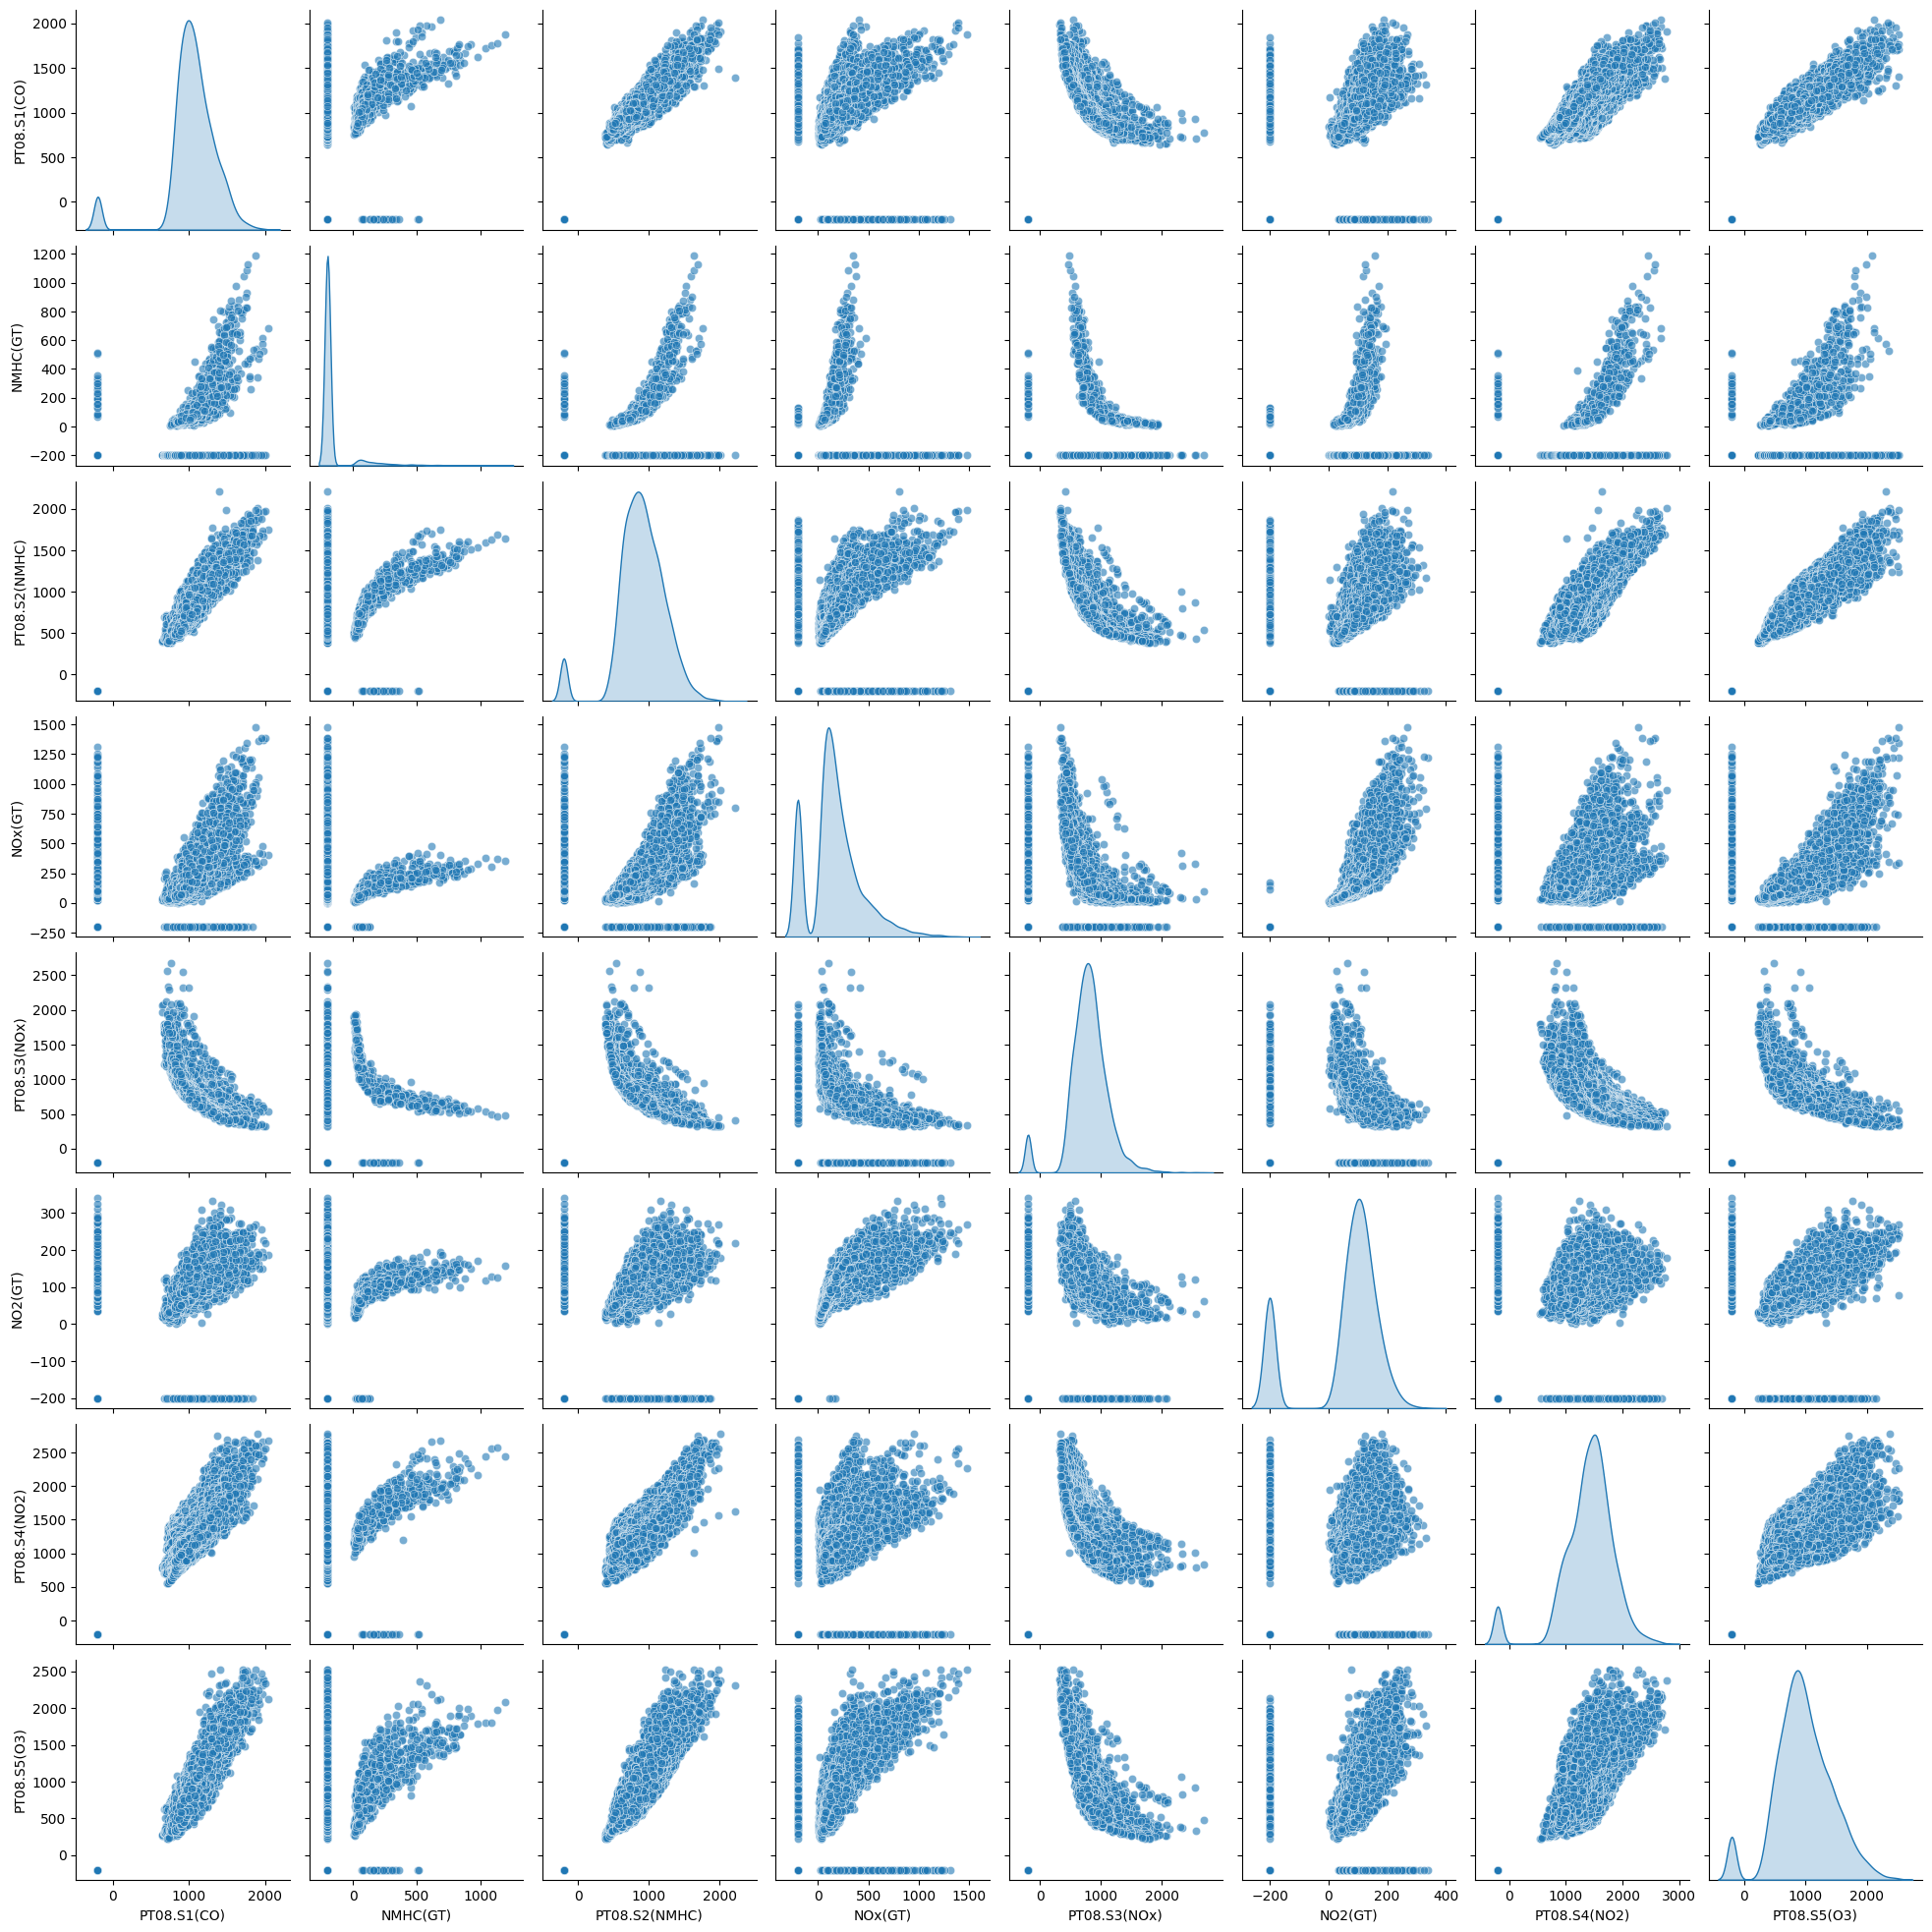

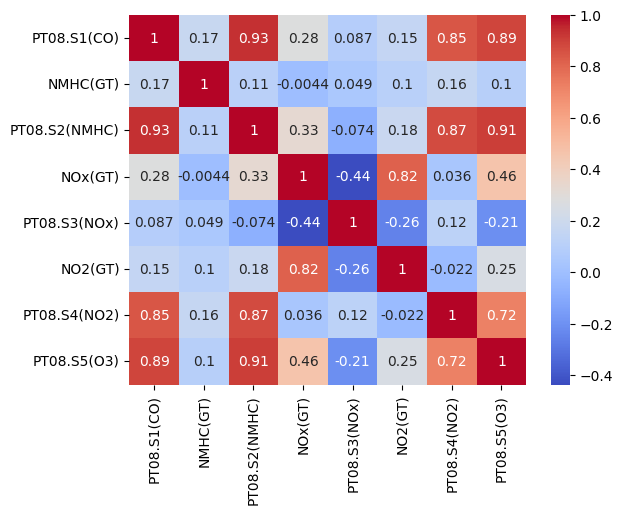

In [319]:

numeric_data = data.select_dtypes(include=['number'])
sns.pairplot(numeric_data, diag_kind="kde", plot_kws={"alpha": 0.6}, palette="Blues")
plt.show()
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [320]:
data = data.replace(to_replace=-200, value=np.nan)

for col in data.columns:
    if col not in ["Date", "Time"] and data[col].dtype == "object":
        data[col] = pd.to_numeric(
            data[col].astype(str).str.replace(",", "."), 
            errors="coerce"
        )

In [321]:
data.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64

In [322]:
mean_values = data.drop(columns=['Date', 'Time'], errors='ignore').mean(numeric_only=True)
print(mean_values)

CO(GT)            -34.207524
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)            1.865683
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                   9.778305
RH                 39.485380
AH                 -6.837604
dtype: float64


In [323]:
data = data.fillna(mean_values.mean())

In [324]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [325]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Now we can operate both Forecasting and Regrassion. We will use the FB Prophet Algorithm

In [326]:
#First we need to convert the date in the following format: DD/MM/YYYY to YYYY-MM-DD

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')


print(data['Date'].head())

print(data)

0   2004-03-10
1   2004-03-10
2   2004-03-10
3   2004-03-10
4   2004-03-10
Name: Date, dtype: datetime64[ns]
           Date      Time  CO(GT)  PT08.S1(CO)   NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18.00.00     2.6       1360.0  150.00000      11.9   
1    2004-03-10  19.00.00     2.0       1292.0  112.00000       9.4   
2    2004-03-10  20.00.00     2.2       1402.0   88.00000       9.0   
3    2004-03-10  21.00.00     2.2       1376.0   80.00000       9.2   
4    2004-03-10  22.00.00     1.6       1272.0   51.00000       6.5   
...         ...       ...     ...          ...        ...       ...   
9352 2005-04-04  10.00.00     3.1       1314.0  457.11807      13.5   
9353 2005-04-04  11.00.00     2.4       1163.0  457.11807      11.4   
9354 2005-04-04  12.00.00     2.4       1142.0  457.11807      12.4   
9355 2005-04-04  13.00.00     2.1       1003.0  457.11807       9.5   
9356 2005-04-04  14.00.00     2.2       1071.0  457.11807      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(

In [327]:
data['Time_clean'] = data['Time'].apply(lambda x: x.replace('.', ':'))

print(data)

           Date      Time  CO(GT)  PT08.S1(CO)   NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18.00.00     2.6       1360.0  150.00000      11.9   
1    2004-03-10  19.00.00     2.0       1292.0  112.00000       9.4   
2    2004-03-10  20.00.00     2.2       1402.0   88.00000       9.0   
3    2004-03-10  21.00.00     2.2       1376.0   80.00000       9.2   
4    2004-03-10  22.00.00     1.6       1272.0   51.00000       6.5   
...         ...       ...     ...          ...        ...       ...   
9352 2005-04-04  10.00.00     3.1       1314.0  457.11807      13.5   
9353 2005-04-04  11.00.00     2.4       1163.0  457.11807      11.4   
9354 2005-04-04  12.00.00     2.4       1142.0  457.11807      12.4   
9355 2005-04-04  13.00.00     2.1       1003.0  457.11807       9.5   
9356 2005-04-04  14.00.00     2.2       1071.0  457.11807      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

In [328]:
print(type(data))
print(type(data['Date']))
print(type(data['Time']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [329]:
datetime_df = data[['Date', 'Time']].copy()

In [330]:
datetime_df.head()

,Date,Time
0,2004-03-10,18.00.00
1,2004-03-10,19.00.00
2,2004-03-10,20.00.00
3,2004-03-10,21.00.00
4,2004-03-10,22.00.00


In [331]:
datetime_df.shape

(9357, 2)

In [332]:
datetime_df['ds'] = datetime_df['Date'].astype(str)+' '+datetime_df['Time'].astype(str)

In [333]:
datetime_df.head()

,Date,Time,ds
0,2004-03-10,18.00.00,2004-03-10 18.00.00
1,2004-03-10,19.00.00,2004-03-10 19.00.00
2,2004-03-10,20.00.00,2004-03-10 20.00.00
3,2004-03-10,21.00.00,2004-03-10 21.00.00
4,2004-03-10,22.00.00,2004-03-10 22.00.00


Let's convert ds to a real data time format

In [334]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Time_clean
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18:00:00
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19:00:00
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20:00:00
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21:00:00
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22:00:00


In [335]:
data['ds'] = datetime_df['ds']

In [336]:

print(data['ds'].head())

print(type(data['ds'])) 


0    2004-03-10 18.00.00
1    2004-03-10 19.00.00
2    2004-03-10 20.00.00
3    2004-03-10 21.00.00
4    2004-03-10 22.00.00
Name: ds, dtype: object
<class 'pandas.core.series.Series'>


In [337]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Time_clean,ds
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18:00:00,2004-03-10 18.00.00
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19:00:00,2004-03-10 19.00.00
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20:00:00,2004-03-10 20.00.00
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21:00:00,2004-03-10 21.00.00
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22:00:00,2004-03-10 22.00.00


In [338]:
data['y'] = data['RH']

In [353]:
import sys
print(sys.executable)
!"{sys.executable}" -m pip install prophet

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\python.exe
  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 13.3 MB/s eta 0:00:00
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [355]:
from prophet import Prophet


In [ ]:
data['ds'] = data['ds'].astype(str).str.replace('.', ':')

data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

prophet_df = data[['ds', 'y']].dropna().copy()
print(prophet_df.head())
print(prophet_df.info())


                   ds     y
0 2004-03-10 18:00:00  48.9
1 2004-03-10 19:00:00  47.7
2 2004-03-10 20:00:00  54.0
3 2004-03-10 21:00:00  60.0
4 2004-03-10 22:00:00  59.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9357 non-null   datetime64[ns]
 1   y       9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.3 KB
None


Prophet Model Training

In [360]:
model = Prophet()
model.fit(prophet_df)

09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:27 - cmdstanpy - INFO - Chain [1] done processing


In [361]:
future = model.make_future_dataframe(periods=365, freq = 'H')
future.tail()

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [363]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,36.810295,-27.958500,102.219766
9718,2005-04-19 16:00:00,36.057184,-25.880559,99.793996
9719,2005-04-19 17:00:00,36.479717,-27.050603,101.984510
9720,2005-04-19 18:00:00,38.504820,-24.285127,100.523568
9721,2005-04-19 19:00:00,41.664430,-20.144986,106.949891


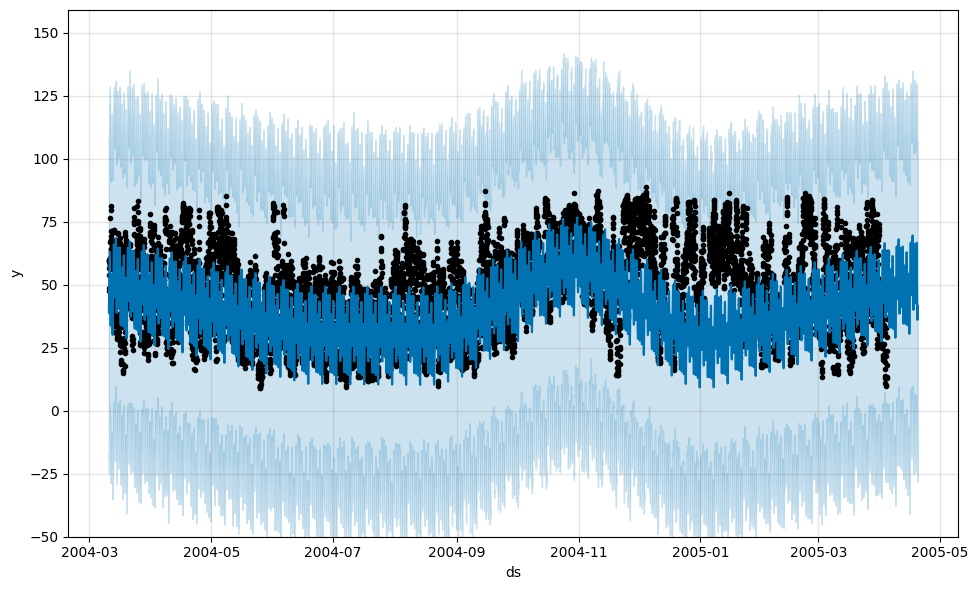

In [ ]:
fig1 = model.plot(forecast)


ax = fig1.gca() 
ax.set_ylim(bottom=-50)  

plt.show()

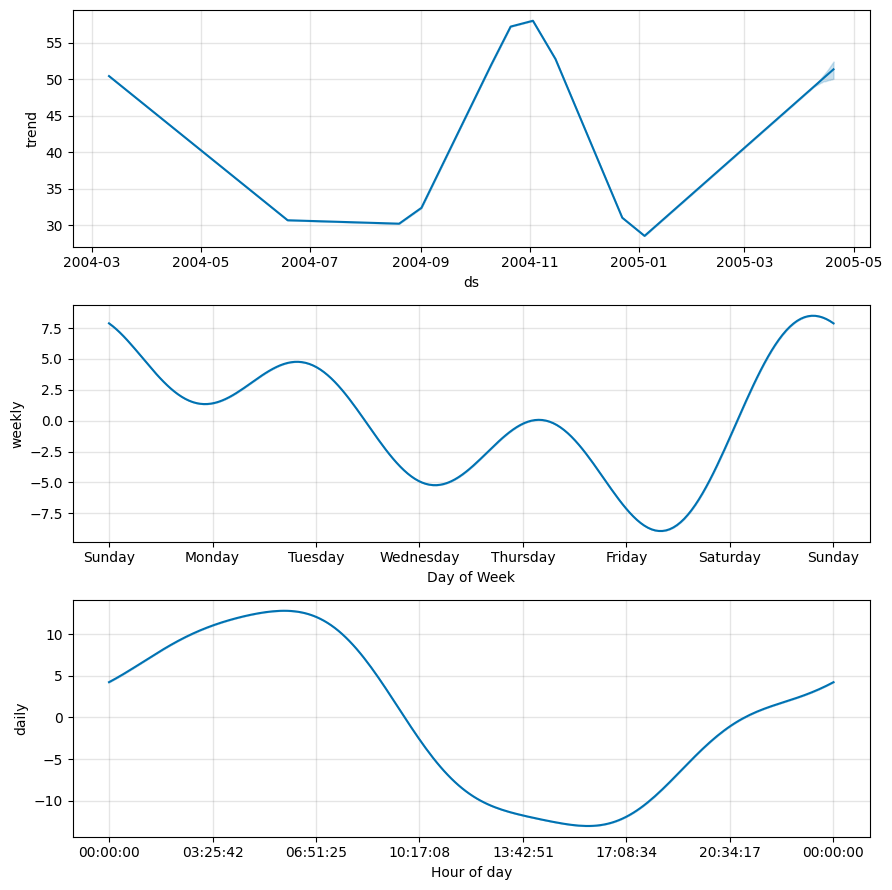

In [368]:
fig2 = model.plot_components(forecast)

In [374]:
import sys
!"{sys.executable}" -m pip install plotly


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 258.0 kB/s eta 0:00:37
   -- -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components
import plotly.io as pio


import prophet.plot
prophet.plot.go = go 

fig = plot_plotly(model, forecast)
pio.renderers.default = 'browser'  
fig.show()



Let's use a Random Forest

In [384]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)',
          'NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)',
          'PT08.S5(O3)','T','RH','AH']]

y = data['CO(GT)']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Absolute Error: 22.357419366821567
Mean Squared Error: 2096.7968600456825
R2 Score: 0.6450991915092102
